In [1]:
#3_3 part 2_D version
import numpy as np
import matplotlib.pyplot as plt
import rbf_network
import data_generation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd

# Extract Data Samples

In [2]:
#train
file_path = r"datasets\ballist.dat"
train = pd.read_csv(file_path,header=None, sep = "\s+| ");
train_inputs = train.iloc[:,:2]
train_outputs= train.iloc[:,2:]

C:\Users\dumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
file_path = r"datasets\balltest.dat"
test = pd.read_csv(file_path,header=None, sep = "\s+| ");
test_inputs = test.iloc[:,:2]
test_outputs= test.iloc[:,2:]

C:\Users\dumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
train_inputs = train_inputs.to_numpy()
train_outputs=train_outputs.to_numpy()
test_inputs=test_inputs.to_numpy()
test_outputs=test_outputs.to_numpy()

In [5]:
# Import libraries
import numpy as np

##### COMPUTE METHODS ######

def gaussian_rbf(x, mu, sigma, n_nodes, n_samples):
    transfor_f = np.zeros((n_samples, n_nodes))
    for i in range(n_samples):
        for j in range(n_nodes):
            transfor_f[i,j] = np.exp(- np.linalg.norm(x[i]-mu[j])**2/ (2 * pow(sigma, 2)))
    return transfor_f

def approx_function(weight, transfor_f):
    return np.dot(weight, transfor_f.T)

def error_function_minimizer(target, weight, transfor_f, n_samples, n_nodes, eta):
    error = approx_function(weight, transfor_f.reshape(1,-1)).T - target
    delta_weights = - eta * np.dot(error.T, transfor_f.reshape(1,-1))
    return delta_weights

def least_squares(phi,target):
    w = np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,target))
    return w.reshape(1,w.shape[0])

def unshuffling(Z,indexes):
    newZ = np.zeros(len(indexes))
    for i in range(len(indexes)):
        newZ[indexes[i]] = Z[0,i]
        
    return newZ

def predict_values(y_test,y_train,weights,transfer_f_test,transfer_f_train):
    y_predict = np.zeros(y_test.shape)
    y_train_predict = np.zeros(y_train.shape)
    for i in range(y_predict.shape[0]):
        y_predict[i] = approx_function(weights,  transfer_f_test[i])
    for i in range(y_train_predict.shape[0]):
        y_train_predict[i] = approx_function(weights,  transfer_f_train[i])
        
    return y_train_predict,y_predict

def competitive_learning(rand_sample, mu, eta, update_index, method = "normal"):
    norm = np.zeros(len(mu)) 
    for i in range(len(norm)):
        norm[i] = np.linalg.norm(rand_sample-mu[i])
    mu[np.argmin(norm)] += eta*(rand_sample-mu[np.argmin(norm)])
    update_index.append(np.argmin(norm))
    if (method == "leaky_learning"):
        for i in range(0,len(mu)):
            if (i!=np.argmin(norm)):
                mu[i] += (eta**2)*(rand_sample-mu[i])
            #mu[np.argmax(norm)] += (eta**2)*(rand_sample-mu[np.argmax(norm)])
        update_index.append(np.argmax(norm))
    return mu, update_index







In [36]:
# Initialize variables
eta = 0.02
n_features = train_inputs.shape[1]
n_nodes = 10
n_samples = train_inputs.shape[0]
epochs = 150

# Find mean and sigma (std) of the training samples per feature
sigma = 0.1
width = 0.05
mean = np.array([0.5,0.5])
mu = np.random.multivariate_normal(mean, sigma*np.identity(2), n_nodes)
#mu = np.random.multivariate_normal(mean, sigma, n_nodes)
# Initialize weights
weights = np.zeros((n_features, n_nodes))


for i in range(n_features):
    for j in range(n_nodes):
        weights[i, j] = np.random.rand()
#print(weights)
# Update weights and analyse the learning curve in each epoch
num_of_it=5
mse_test = np.zeros((epochs,num_of_it))
mse_train = np.zeros((epochs,num_of_it))
mse_test_abs = np.zeros((epochs,num_of_it))
mse_train_abs = np.zeros((epochs,num_of_it))
update_index = []

test_abs_mean=np.zeros(9)
test_mean = np.zeros(9)
test_abs_std=np.zeros(9)
test_std = np.zeros(9)

number of nodes 10
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(100, 2)
(100, 2)
[[0.06507647 0.0794144  0.0798305  0.06743232 0.09648278]
 [0.06488955 0.07836887 0.07944745 0.0671213  0.09548824]
 [0.06471449 0.07737874 0.07908421 0.06682784 0.09455979]
 [0.06455078 0.07644177 0.07873976 0.06655009 0.09369253]
 [0.06439675 0.07555307 0.07841222 0.06628731 0.09288196]
 [0.06425216 0.07471187 0.07810175 0.06603901 0.09212447]
 [0.06411677 0.07391494 0.07780821 0.06580382 0.09141587]
 [0.06398945 0.07315936 0.07752848 0.06558066 0.09075333]
 [0.06387011 0.07244348 0.07726284 0.06536934 0.09013354]
 [0.06375762 0.07176541 0.07701078 0.06516851 0.08955294]
 [0.06365206 0.07112247 0.07677149 0.06497827 0.08900946]
 [0.06355269 0.07051255 0.07654435 0.06479763 0.08850022]
 [0.06345887 0.06993483 0.07632855 0.06462598 

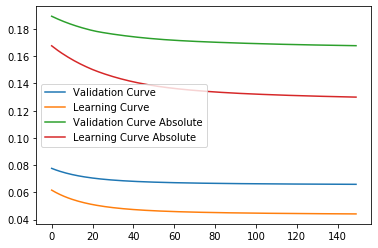

mse mean 0.0659292776743399
mse mean std 0.008453298550205924
mse abs mean 0.16773907129775592
mse abs std 0.013469215875716218
number of nodes 20
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
(100, 2)
(100, 2)
[[0.10167356 0.08170006 0.11599283 0.10138525 0.08879947]
 [0.09990957 0.08067827 0.1137756  0.09904387 0.08746788]
 [0.09823904 0.07970201 0.11172344 0.096857   0.08624817]
 [0.09665629 0.07876962 0.1098211  0.09481227 0.08512275]
 [0.09515626 0.07787951 0.10805348 0.09290114 0.08408801]
 [0.09373436 0.07702838 0.10641229 0.09111318 0.08313487]
 [0.09238456 0.07621566 0.10488114 0.08943961 0.08225797]
 [0.09110384 0.07543791 0.10345248 0.08787189 0.08144671]
 [0.08988833 0.07469519 0.10211589 0.086401   0.08069962]
 [0.08873296 0.07398322 0.10086755 0.08502125 0.0800

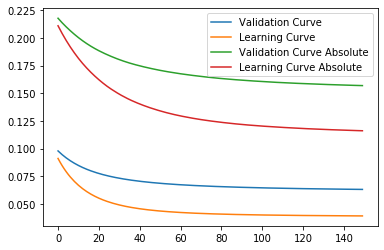

mse mean 0.0631010644282068
mse mean std 0.008250722099887281
mse abs mean 0.15702522011035797
mse abs std 0.012745365261788986
number of nodes 30
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
(100, 2)
(100, 2)
[[0.1507892  0.08680918 0.12477902 0.14827849 0.10023853]
 [0.14803464 0.08347105 0.12010552 0.14441293 0.09687021]
 [0.14541881 0.0805444  0.11590017 0.14085514 0.09382696]
 [0.14293022 0.0779665  0.11211404 0.13757637 0.09106414]
 [0.14056391 0.07569717 0.10869758 0.13455035 0.08855818]
 [0.13831409 0.07369108 0.10561444 0.13175356 0.086281  ]
 [0.13617283 0.07191856 0.10282567 0.12916637 0.08420338]
 [0.13413457 0.0703445  0.10030067 0.12677009 0.08230671]
 [0.13219449 0.0689428  0.09801372 0.12454463 0.08057014]
 [0.13034357

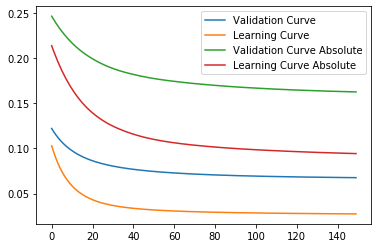

mse mean 0.06762685551808913
mse mean std 0.013917706184952503
mse abs mean 0.16270541838727834
mse abs std 0.01602825210831712
number of nodes 40
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
(100, 2)
(100, 2)
[[0.11930475 0.14834152 0.13808974 0.22061421 0.13139252]
 [0.11485541 0.14284628 0.12687619 0.20986097 0.12494719]
 [0.11096009 0.13777239 0.11722397 0.20004869 0.11918446]
 [0.10753508 0.13307897 0.10890657 0.19109391 0.11403059]
 [0.10450997 0.12873573 0.10172016 0.18290302 0.10942619]
 [0.10182405 0.12471026 0.0954955  0.17541267 0.10530249]
 [0.09942898 0.12097453 0.0900918  0.16855805 0.1016032 ]
 [0.09728254 0.11750366 0.08539266 0.16227435 0.09828647]
 [0.09535126 0.11427922 0.0812

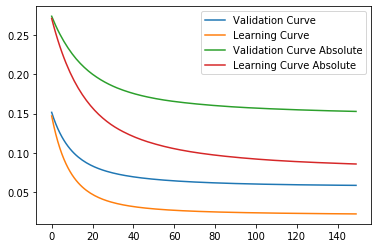

mse mean 0.05901783547288082
mse mean std 0.011736026044760624
mse abs mean 0.15271812180973746
mse abs std 0.020862045445382477
number of nodes 50
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
(100, 2)
(100, 2)
[[0.13318307 0.13056956 0.23377846 0.17289857 0.14359507]
 [0.1258605  0.12442025 0.21527962 0.16046537 0.13296758]
 [0.1191673  0.11891621 0.19917656 0.14957741 0.12418772]
 [0.11304499 0.11399095 0.18513577 0.14000018 0.11691345]
 [0.10743276 0.10957478 0.17282633 0.13155931 0.11081956]
 [0.10228769 0.10560202 0.16203748 0.12409565 0.10565279]
 [0.09756047 0.10202738 0.15256281 0.11747555 0.10122504]
 [0.09321294 0.09880759 0.1442094  0.11159294 0

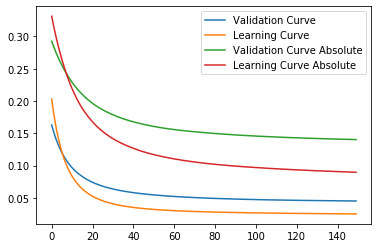

mse mean 0.045051407481016804
mse mean std 0.010595445272892506
mse abs mean 0.1401862744394297
mse abs std 0.01856462210632867
number of nodes 60
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
(100, 2)
(100, 2)
[[0.21941391 0.34292971 0.27814703 0.2332504  0.21827417]
 [0.20510928 0.32519066 0.25766663 0.21678883 0.19730252]
 [0.19263551 0.30882659 0.24072387 0.2029887  0.17994448]
 [0.18169767 0.29371883 0.2265368  0.19130266 0.16546644]
 [0.17207774 0.27975842 0.21453906 0.18136015 0.1532985 ]
 [0.16358957 0.26682717 0.20423099 0.17281963 0.14300349]
 [0.15605179 0.25484503 0.19528209 0.1654383  0.13422597]
 [0.1493

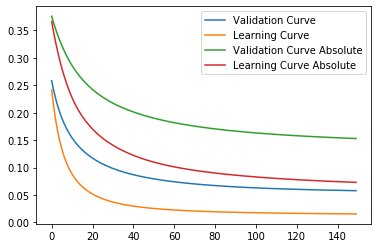

mse mean 0.057912098993860205
mse mean std 0.011413894911349365
mse abs mean 0.15293961164058897
mse abs std 0.013057262065171433
number of nodes 70
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
(100, 2)
(100, 2)
[[0.26297007 0.21704649 0.21783661 0.28218647 0.37026282]
 [0.23956152 0.19800045 0.20306616 0.25877311 0.33551407]
 [0.21943769 0.18125946 0.19048249 0.23864413 0.30638834]
 [0.20207558 0.16650712 0.17966939 0.22121325 0.28194641]
 [0.18709084 0.15355585 0.17030225 0.20611666 0.26124437]
 [0.17410417 0.14213949 0.1620995  0.19296001 0.24349428]
 [0.16282663 0.13205845 

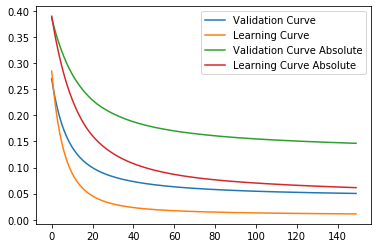

mse mean 0.05031982368037102
mse mean std 0.01078436829710799
mse abs mean 0.14651251481493124
mse abs std 0.014981308465148882
number of nodes 80
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
(100, 2)
(100, 2)
[[0.39988724 0.41631984 0.51979309 0.48468728 0.36917972]
 [0.35998707 0.36839986 0.48717924 0.43449135 0.33927631]
 [0.32644008 0.32936761 0.45791231 0.3921838  0.31356054]
 [0.29810945 0.29735581 0.43156235 0.35631901 0.29138915]
 [0.27402684 0.27098711 0.40781812 0.32580217 0.27215371]
 [0.25346532 0.24913187 0.38636189 0.2996186

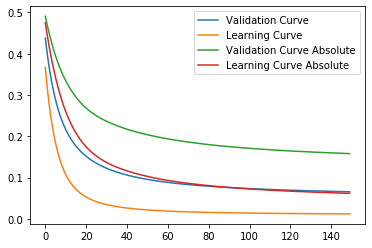

mse mean 0.06579822876719257
mse mean std 0.02189682911474812
mse abs mean 0.15819956740907992
mse abs std 0.025728245283637083
number of nodes 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
training epoch: 0
training epoch: 100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
(100, 2)
(100, 2)
[[0.4953597  0.54084279 0.63398556 0.57728735 0.49690132]
 [0.42967339 0.48067901 0.58527484 0.52483414 0.44724568]
 [0.37631362 0.42991317 0.54155922 0.4809002  0.40433883]
 [0.33261805 0.38696117 0.50231487 0.44377313 0.3671726 ]
 [0.29671977 0.350429

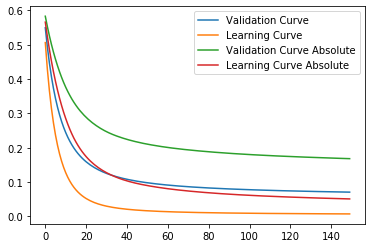

mse mean 0.07000746068070972
mse mean std 0.029411818981427394
mse abs mean 0.1675545477151325
mse abs std 0.020268057888687737


In [37]:
sizes = [10,20,30,40,50,60,70,80,100]
#sizes[10]
for size in range(len(sizes)):
    n_nodes=sizes[size]
    print("number of nodes " + str(n_nodes))
    for it in range(num_of_it):
        mu = np.random.multivariate_normal(mean, sigma*np.identity(2), n_nodes)
        mu = np.random.rand(n_nodes,2)
        #mu = np.random.multivariate_normal(mean, sigma, n_nodes)
        # Initialize weights
        weights = np.zeros((n_features, n_nodes))


        for i in range(n_features):
            for j in range(n_nodes):
                weights[i, j] = np.random.rand()

        for epoch in range(epochs):
            indices = np.arange(train_inputs.shape[0])
            np.random.shuffle(indices)
            new_x_train = train_inputs[indices,:]
            new_y_train = train_outputs[indices,:]
            # Update mu (rbf weight) by competitive learning (one per epoch)
            mu, update_index = competitive_learning(new_x_train[0], mu, eta, update_index, method = "leaky_learning") # Or "leaky_learning"

        for epoch in range(epochs):
            #Shuffling data
            indices = np.arange(train_inputs.shape[0])
            np.random.shuffle(indices)
            new_x_train = train_inputs[indices,:]
            new_y_train = train_outputs[indices,:]

            # Update mu (rbf weight) by competitive learning (one per epoch)
            #mu, update_index = rbf_network.competitive_learning(new_x_train[0], mu, eta, update_index, method = "normal") # Or "leaky_learning"

            # Generate the transfer functions
            transfer_f_train = gaussian_rbf(new_x_train, mu, width, n_nodes, n_samples)
            transfer_f_test = gaussian_rbf(test_inputs, mu, width, n_nodes, n_samples)

            #Apply sequential learning (delta rule)
            for i in range(new_x_train.shape[0]):
                d_weights = error_function_minimizer(new_y_train[i,:], weights, transfer_f_train[i,:], n_samples, n_nodes, eta)
                weights += d_weights

            # Predict values
            y_train_predict,y_predict = predict_values(test_outputs,new_y_train,weights,transfer_f_test,transfer_f_train)   

            mse_test[epoch,it] = mean_squared_error(y_predict, test_outputs)
            mse_train[epoch,it] = mean_squared_error(y_train_predict, new_y_train)
            mse_test_abs[epoch,it] = mean_absolute_error(y_predict, test_outputs)
            mse_train_abs[epoch,it] = mean_absolute_error(y_train_predict, new_y_train)
            if (epoch%100 ==0):
                print("training epoch:",epoch)

    print(set(update_index))
    y_train_predict,y_predict = predict_values(test_outputs,train_outputs,weights,transfer_f_test,transfer_f_train)
    print(y_train_predict.shape)
    print(test_inputs.shape)
    # Plot final predicted curve X true curve
    #plt.plot(test_inputs, y_predict, label = "Predicted")
    #plt.plot(test_inputs, test_outputs, label = "True")
    #plt.legend()
    #plt.show()
    print(mse_test)
    # Plot learning Curve
    plt.plot(range(epochs), mse_test.mean(axis=1), label = "Validation Curve")
    plt.plot(range(epochs), mse_train.mean(axis=1), label = "Learning Curve")
    plt.plot(range(epochs), mse_test_abs.mean(axis=1), label = "Validation Curve Absolute")
    plt.plot(range(epochs), mse_train_abs.mean(axis=1), label = "Learning Curve Absolute")
    plt.legend()
    plt.show()
    print("mse mean",mse_test[-1].mean())
    print("mse mean std", mse_test[-1].std())
    print("mse abs mean",mse_test_abs[-1].mean())
    print("mse abs std",mse_test_abs[-1].std())
    test_abs_mean[size] = mse_test[-1].mean()
    test_mean[size] =mse_test_abs[-1].mean()
    test_abs_std[size] = mse_test[-1].std()
    test_std[size] =mse_test_abs[-1].std()

In [30]:
from scipy.stats import multivariate_normal
def plot_contours(X, means, label_name):
    plt.figure()
    if(label_name=='Train '):
        color = 'y'
    else:
        color ='r'
    plt.scatter(X[:, 0], X[:, 1], label=label_name+'Points',color=color)
    k = means.shape[0]
    delta = 0.025
    x = np.arange(-0.1, 1.1, delta)
    y = np.arange(-0.1, 1.1, delta)
    X, Y = np.meshgrid(x, y)
    for i in range(k):
        mean = means[i,:]
        #print(mean)
        #plt.plot(mean[0],mean[1],color='r')
        #cov = np.identity(2)*width
        #aux = np.dstack((X,Y))
        #Z = multivariate_normal(mean,cov)
        #plt.contour(X, Y, 2*np.pi*width*Z.pdf(aux), alpha=0.1)
    #plt.tight_layout()
    plt.title("Input space layout of RBF network with " + str(n_nodes) + " RBF cells")
    
    plt.scatter(means[:,0],means[:,1],label='RBF cells means')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

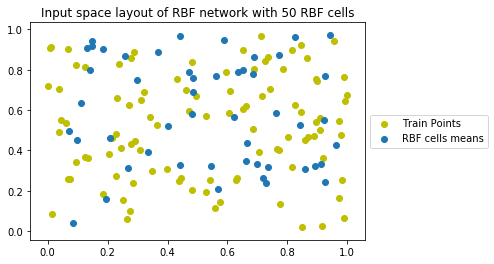

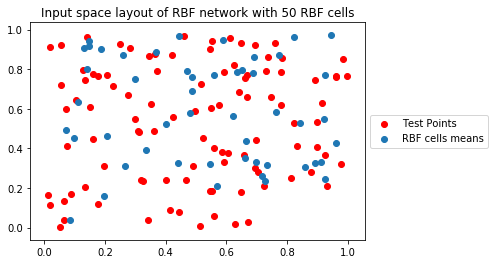

In [31]:
n_nodes=50
eta=0.02
mu = np.random.rand(n_nodes,2)#np.random.multivariate_normal(mean, sigma*np.identity(2), n_nodes)
    #mu = np.random.multivariate_normal(mean, sigma, n_nodes)
    # Initialize weights
weights = np.zeros((n_features, n_nodes))


for i in range(n_features):
    for j in range(n_nodes):
        weights[i, j] = np.random.rand()

for epoch in range(epochs):
    indices = np.arange(train_inputs.shape[0])
    np.random.shuffle(indices)
    new_x_train = train_inputs[indices,:]
    new_y_train = train_outputs[indices,:]
    # Update mu (rbf weight) by competitive learning (one per epoch)
    mu, update_index = competitive_learning(new_x_train[0], mu, eta, update_index, method = "leaky_learning") # Or "leaky_learning"

plot_contours(train_inputs,mu,label_name='Train ')
plot_contours(test_inputs,mu,label_name='Test ')

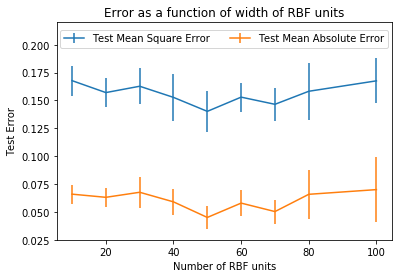

In [53]:

plt.errorbar(sizes,test_mean,test_std,label='Test Mean Square Error')
plt.errorbar(sizes,test_abs_mean,test_abs_std,label='Test Mean Absolute Error')
plt.ylim(0.025,0.22)
plt.xlabel("Number of RBF units")
plt.ylabel("Test Error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99),
          ncol=3,fancybox=True)
plt.title("Error as a function of width of RBF units")
plt.savefig("3_3_width2D_leaky")